### IPAWS Data Splitting and Graph Retrieval

This notebook is the next step after Data Extraction from API and Cleaning the Dataset. In this notebook we will further refine the data and split it into 3 tables of Alert, Location and Instruction. This Tables can then be put out on Graph and formed relationship with.

The graph was developed locally on Neo4j Desktop of which I will share the commands in this notebook.

Finally the developed graph was accessed in this notebook using `py2neo` and performed queries on.

In [ ]:
import pandas as pd
import re
import numpy as np
from datetime import datetime

Here we are reading the file we created in the last notebook `IPAWS_DataExtractionAndCleaning.ipynb`.

In [ ]:
df = pd.read_csv('IPAWS_Filtered_Data.csv')

In [ ]:
df

,areaDesc,category,certainty,description,effective,event,headline,instruction,responseType,senderName,severity,urgency
0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",Met,Observed,The National Weather Service in Norman has iss...,2021-10-11 01:59:00+00:00,Severe Thunderstorm Warning,Severe Thunderstorm Warning issued October 10 ...,A Tornado Watch remains in effect for the warn...,Shelter,NWS Norman OK,Severe,Immediate
1,Coastal waters from Baffin Bay to Port Aransas...,Met,Likely,WHAT South winds 20 to 25 knots with gusts up ...,2021-10-11 02:56:00+00:00,Small Craft Advisory,Small Craft Advisory issued October 10 at 9:56...,"Inexperienced mariners, especially those opera...",Avoid,NWS Corpus Christi TX,Minor,Expected
2,Rock Island Passage to Sturgeon Bay WI; Sturge...,Met,Likely,WHAT South winds 15 to 20 kts with gusts to 30...,2021-10-11 02:45:00+00:00,Small Craft Advisory,Small Craft Advisory issued October 10 at 9:45...,"Inexperienced mariners, especially those opera...",Avoid,NWS Green Bay WI,Minor,Expected
3,Wilson; Neosho; Montgomery; Labette,Met,Observed,"At 938 PM CDT, Doppler radar was tracking a st...",2021-10-11 02:38:00+00:00,Special Weather Statement,Special Weather Statement issued October 10 at...,"If outdoors, consider seeking shelter inside a...",Execute,NWS Wichita KS,Moderate,Expected
4,"Bosque, TX; Ellis, TX; Hill, TX; Johnson, TX; ...",Met,Observed,The National Weather Service in Fort Worth has...,2021-10-11 02:16:00+00:00,Severe Thunderstorm Warning,Severe Thunderstorm Warning issued October 10 ...,A Tornado Watch remains in effect until 200 AM...,Shelter,NWS Fort Worth TX,Severe,Immediate
...,...,...,...,...,...,...,...,...,...,...,...,...
325896,Marion; Wahkiakum; Clackamas; Columbia; Washin...,Met,Likely,THE NATIONAL WEATHER SERVICE IN PORTLAND HAS C...,2016-12-17 22:37:34+00:00,Winter Weather Advisory,Winter Weather Advisory issued December 17 at ...,,Execute,NWS Portland OR,Moderate,Expected
325897,Marion,Met,Possible,KSC115-252200- /O.CAN.KICT.SV.A.0520.000000T00...,2016-12-25 20:58:14+00:00,Severe Thunderstorm Watch,Severe Thunderstorm Watch issued December 25 a...,,Monitor,NWS Wichita KS,Severe,Future
325898,Rich; Utah; Weber; Wasatch; Cache; Morgan; Jua...,Met,Likely,AFFECTED AREA THE WASATCH MOUNTAINS OF NORTHER...,2016-12-25 22:33:36+00:00,Winter Storm Warning,Winter Storm Warning issued December 25 at 3:3...,A WINTER STORM WARNING FOR HEAVY SNOW MEANS TH...,Prepare,NWS Salt Lake City UT,Severe,Expected
325899,Marquette to Munising MI; Huron Islands to Mar...,Met,Likely,A SMALL CRAFT ADVISORY REMAINS IN EFFECT UNTIL...,2016-12-27 15:29:49+00:00,Small Craft Advisory,Small Craft Advisory issued December 27 at 10:...,A SMALL CRAFT ADVISORY MEANS THAT WIND SPEEDS ...,Avoid,NWS Marquette MI,Minor,Expected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325901 entries, 0 to 325900
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   areaDesc      325901 non-null  object
 1   category      325901 non-null  object
 2   certainty     325901 non-null  object
 3   description   325358 non-null  object
 4   effective     325847 non-null  object
 5   event         325901 non-null  object
 6   headline      325893 non-null  object
 7   instruction   262188 non-null  object
 8   responseType  312156 non-null  object
 9   senderName    325900 non-null  object
 10  severity      325901 non-null  object
 11  urgency       325901 non-null  object
dtypes: object(12)
memory usage: 29.8+ MB


In [ ]:
df.dropna(subset=['instruction', 'description', 'effective', 'responseType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254056 entries, 0 to 325900
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   areaDesc      254056 non-null  object
 1   category      254056 non-null  object
 2   certainty     254056 non-null  object
 3   description   254056 non-null  object
 4   effective     254056 non-null  object
 5   event         254056 non-null  object
 6   headline      254056 non-null  object
 7   instruction   254056 non-null  object
 8   responseType  254056 non-null  object
 9   senderName    254056 non-null  object
 10  severity      254056 non-null  object
 11  urgency       254056 non-null  object
dtypes: object(12)
memory usage: 25.2+ MB


In [ ]:
df

,areaDesc,category,certainty,description,effective,event,headline,instruction,responseType,senderName,severity,urgency
0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",Met,Observed,The National Weather Service in Norman has iss...,2021-10-11 01:59:00+00:00,Severe Thunderstorm Warning,Severe Thunderstorm Warning issued October 10 ...,A Tornado Watch remains in effect for the warn...,Shelter,NWS Norman OK,Severe,Immediate
1,Coastal waters from Baffin Bay to Port Aransas...,Met,Likely,WHAT South winds 20 to 25 knots with gusts up ...,2021-10-11 02:56:00+00:00,Small Craft Advisory,Small Craft Advisory issued October 10 at 9:56...,"Inexperienced mariners, especially those opera...",Avoid,NWS Corpus Christi TX,Minor,Expected
2,Rock Island Passage to Sturgeon Bay WI; Sturge...,Met,Likely,WHAT South winds 15 to 20 kts with gusts to 30...,2021-10-11 02:45:00+00:00,Small Craft Advisory,Small Craft Advisory issued October 10 at 9:45...,"Inexperienced mariners, especially those opera...",Avoid,NWS Green Bay WI,Minor,Expected
3,Wilson; Neosho; Montgomery; Labette,Met,Observed,"At 938 PM CDT, Doppler radar was tracking a st...",2021-10-11 02:38:00+00:00,Special Weather Statement,Special Weather Statement issued October 10 at...,"If outdoors, consider seeking shelter inside a...",Execute,NWS Wichita KS,Moderate,Expected
4,"Bosque, TX; Ellis, TX; Hill, TX; Johnson, TX; ...",Met,Observed,The National Weather Service in Fort Worth has...,2021-10-11 02:16:00+00:00,Severe Thunderstorm Warning,Severe Thunderstorm Warning issued October 10 ...,A Tornado Watch remains in effect until 200 AM...,Shelter,NWS Fort Worth TX,Severe,Immediate
...,...,...,...,...,...,...,...,...,...,...,...,...
325896,Marion; Wahkiakum; Clackamas; Columbia; Washin...,Met,Likely,THE NATIONAL WEATHER SERVICE IN PORTLAND HAS C...,2016-12-17 22:37:34+00:00,Winter Weather Advisory,Winter Weather Advisory issued December 17 at ...,,Execute,NWS Portland OR,Moderate,Expected
325897,Marion,Met,Possible,KSC115-252200- /O.CAN.KICT.SV.A.0520.000000T00...,2016-12-25 20:58:14+00:00,Severe Thunderstorm Watch,Severe Thunderstorm Watch issued December 25 a...,,Monitor,NWS Wichita KS,Severe,Future
325898,Rich; Utah; Weber; Wasatch; Cache; Morgan; Jua...,Met,Likely,AFFECTED AREA THE WASATCH MOUNTAINS OF NORTHER...,2016-12-25 22:33:36+00:00,Winter Storm Warning,Winter Storm Warning issued December 25 at 3:3...,A WINTER STORM WARNING FOR HEAVY SNOW MEANS TH...,Prepare,NWS Salt Lake City UT,Severe,Expected
325899,Marquette to Munising MI; Huron Islands to Mar...,Met,Likely,A SMALL CRAFT ADVISORY REMAINS IN EFFECT UNTIL...,2016-12-27 15:29:49+00:00,Small Craft Advisory,Small Craft Advisory issued December 27 at 10:...,A SMALL CRAFT ADVISORY MEANS THAT WIND SPEEDS ...,Avoid,NWS Marquette MI,Minor,Expected


In [ ]:
df.nunique()

,0
areaDesc,74890
category,16
certainty,4
description,216677
effective,178327
event,122
headline,210910
instruction,34521
responseType,11
senderName,287


We will make sure that the columns with text is cleaned properly to make the further steps easy.

In [ ]:
# Standardize text data for consistency
# Convert text columns to lowercase and strip leading/trailing spaces
text_columns = ['category', 'certainty', 'description', 'event', 'headline', 'instruction', 'responseType', 'senderName']
for col in text_columns:
    df[col] = df[col].str.lower().str.strip()

# Normalize date format for 'effective'
df['effective'] = pd.to_datetime(df['effective'], errors='coerce')

# Handle missing values in 'instruction' column by filling with 'no instruction provided'
df['instruction'].fillna('no instruction provided', inplace=True)

<ipython-input-8-4063881bd0de>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['instruction'].fillna('no instruction provided', inplace=True)


In [ ]:
for col in text_columns:
    df[col] = df[col].str.replace(r'[\'"]', '', regex=True)

Splitting `areaDesc` for `Locations Table`

In [ ]:
# Split 'areaDesc' into multiple regions
def split_area_desc(area_desc):
    # Split by semicolon or comma
    return re.split(r'; ', area_desc)

df['areas'] = df['areaDesc'].apply(split_area_desc)

# Expand 'areas' into separate rows to better normalize the data
df = df.explode('areas')

In [ ]:
df

,areaDesc,category,certainty,description,effective,event,headline,instruction,responseType,senderName,severity,urgency,areas
0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Carter, OK"
0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Coal, OK"
0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Garvin, OK"
0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Johnston, OK"
0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Murray, OK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325899,Marquette to Munising MI; Huron Islands to Mar...,met,likely,a small craft advisory remains in effect until...,2016-12-27 15:29:49+00:00,small craft advisory,small craft advisory issued december 27 at 10:...,a small craft advisory means that wind speeds ...,avoid,nws marquette mi,Minor,Expected,Huron Islands to Marquette MI
325899,Marquette to Munising MI; Huron Islands to Mar...,met,likely,a small craft advisory remains in effect until...,2016-12-27 15:29:49+00:00,small craft advisory,small craft advisory issued december 27 at 10:...,a small craft advisory means that wind speeds ...,avoid,nws marquette mi,Minor,Expected,Grand Marais to Whitefish Point MI
325899,Marquette to Munising MI; Huron Islands to Mar...,met,likely,a small craft advisory remains in effect until...,2016-12-27 15:29:49+00:00,small craft advisory,small craft advisory issued december 27 at 10:...,a small craft advisory means that wind speeds ...,avoid,nws marquette mi,Minor,Expected,Munising to Grand Marais MI
325900,Chesapeake Bay from New Point Comfort to Littl...,met,likely,the national weather service in wakefield has ...,2016-12-26 06:02:35+00:00,small craft advisory,small craft advisory issued december 26 at 1:0...,a small craft advisory means wind speeds of 20...,avoid,nws wakefield va,Minor,Expected,Chesapeake Bay from New Point Comfort to Littl...


This can be utilized but the output it currently produced required more refined NLP techniques which was not adopted at the moment.

In [ ]:
# # Tokenize and extract key phrases from 'description' and 'headline'
# from sklearn.feature_extraction.text import CountVectorizer

# # Function to extract key phrases
# def extract_key_phrases(text_series, n=10):
#     vectorizer = CountVectorizer(max_df=0.85, stop_words='english', max_features=n)
#     X = vectorizer.fit_transform(text_series)
#     return vectorizer.get_feature_names_out()

# # Extract key phrases from 'description' and 'headline'
# description_key_phrases = extract_key_phrases(df['description'])
# headline_key_phrases = extract_key_phrases(df['headline'])

# # Create new columns for key phrases (useful for semantic analysis later)
# df['description_key_phrases'] = df['description'].apply(lambda x: ', '.join([kp for kp in description_key_phrases if kp in x]))
# df['headline_key_phrases'] = df['headline'].apply(lambda x: ', '.join([kp for kp in headline_key_phrases if kp in x]))

In [ ]:
# Convert severity and urgency to categorical types for efficient storage
df['severity'] = df['severity'].astype('category')
df['urgency'] = df['urgency'].astype('category')
df['certainty'] = df['certainty'].astype('category')
df['responseType'] = df['responseType'].astype('category')

In [ ]:
print(df)
print(df.info())
print(df.nunique())

                                                 areaDesc category certainty  \
0       Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...      met  observed   
0       Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...      met  observed   
0       Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...      met  observed   
0       Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...      met  observed   
0       Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...      met  observed   
...                                                   ...      ...       ...   
325899  Marquette to Munising MI; Huron Islands to Mar...      met    likely   
325899  Marquette to Munising MI; Huron Islands to Mar...      met    likely   
325899  Marquette to Munising MI; Huron Islands to Mar...      met    likely   
325900  Chesapeake Bay from New Point Comfort to Littl...      met    likely   
325900  Chesapeake Bay from New Point Comfort to Littl...      met    likely   

                                       

In [ ]:
# Create a unique alert ID for each row
df.reset_index(inplace=True)
df.rename(columns={'index': 'alert_id'}, inplace=True)

In [ ]:
df

,alert_id,areaDesc,category,certainty,description,effective,event,headline,instruction,responseType,senderName,severity,urgency,areas
0,0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Carter, OK"
1,0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Coal, OK"
2,0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Garvin, OK"
3,0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Johnston, OK"
4,0,"Carter, OK; Coal, OK; Garvin, OK; Johnston, OK...",met,observed,the national weather service in norman has iss...,2021-10-11 01:59:00+00:00,severe thunderstorm warning,severe thunderstorm warning issued october 10 ...,a tornado watch remains in effect for the warn...,shelter,nws norman ok,Severe,Immediate,"Murray, OK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973122,325899,Marquette to Munising MI; Huron Islands to Mar...,met,likely,a small craft advisory remains in effect until...,2016-12-27 15:29:49+00:00,small craft advisory,small craft advisory issued december 27 at 10:...,a small craft advisory means that wind speeds ...,avoid,nws marquette mi,Minor,Expected,Huron Islands to Marquette MI
973123,325899,Marquette to Munising MI; Huron Islands to Mar...,met,likely,a small craft advisory remains in effect until...,2016-12-27 15:29:49+00:00,small craft advisory,small craft advisory issued december 27 at 10:...,a small craft advisory means that wind speeds ...,avoid,nws marquette mi,Minor,Expected,Grand Marais to Whitefish Point MI
973124,325899,Marquette to Munising MI; Huron Islands to Mar...,met,likely,a small craft advisory remains in effect until...,2016-12-27 15:29:49+00:00,small craft advisory,small craft advisory issued december 27 at 10:...,a small craft advisory means that wind speeds ...,avoid,nws marquette mi,Minor,Expected,Munising to Grand Marais MI
973125,325900,Chesapeake Bay from New Point Comfort to Littl...,met,likely,the national weather service in wakefield has ...,2016-12-26 06:02:35+00:00,small craft advisory,small craft advisory issued december 26 at 1:0...,a small craft advisory means wind speeds of 20...,avoid,nws wakefield va,Minor,Expected,Chesapeake Bay from New Point Comfort to Littl...


In [ ]:
# Create Alert table
alert_columns = ['alert_id', 'event', 'category', 'certainty', 'severity', 'urgency', 'effective', 'headline', 'description', 'senderName']
alert_df = df[alert_columns].drop_duplicates()

# Create Location table
location_columns = ['alert_id', 'areas']
location_df = df[location_columns].drop_duplicates()

# Create Instruction table
instruction_columns = ['alert_id', 'instruction', 'responseType']
instruction_df = df[instruction_columns].drop_duplicates()

In [ ]:
# Save the split tables to CSV files
alert_df.to_csv('alert_table.csv', index=False)
location_df.to_csv('location_table.csv', index=False)
instruction_df.to_csv('instruction_table.csv', index=False)

## Cypher Queries for Neo4j Desktop

Download these files to your PC and load it to Neo4j using the following Cypher Queries:

For Alert Table

```
CALL apoc.periodic.iterate(
  "LOAD CSV WITH HEADERS FROM 'file:///alert_table.csv' AS row RETURN row",
  "MERGE (a:Alert {alert_id: row.alert_id})
   SET a.event = row.event, a.category = row.category, a.certainty = row.certainty,
       a.severity = row.severity, a.urgency = row.urgency, a.effective = row.effective,
       a.headline = row.headline, a.description = row.description, a.senderName = row.senderName",
  {batchSize: 500, parallel: false, retries: 5}
);
```

For Location Table
```
CALL apoc.periodic.iterate(
  "LOAD CSV WITH HEADERS FROM 'file:///location_table.csv' AS row RETURN row",
  "MERGE (l:Location {name: row.areas})
   WITH l, row
   MATCH (a:Alert {alert_id: row.alert_id})
   MERGE (a)-[:HAS_LOCATION]->(l)",
  {batchSize: 500, parallel: false, retries: 5}
);
```

For Instruction Table
```
CALL apoc.periodic.iterate(
  "LOAD CSV WITH HEADERS FROM 'file:///instruction_table.csv' AS row RETURN row",
  "MERGE (i:Instruction {instruction: row.instruction, responseType: row.responseType})
   WITH i, row
   MATCH (a:Alert {alert_id: row.alert_id})
   MERGE (a)-[:HAS_INSTRUCTION]->(i)",
  {batchSize: 500, parallel: false, retries: 5}
);

```
You might want to modify `batchSize` and `parallel` processing based on your PC's computing capacity


## Dumping and Restoration of Developed Graph Database

Now that we have developed the graph, it is important to make it accessible. Without hosting on cloud, this is not quite possible and the size of data that we have cannot be loaded on free versions of cloud services. Thus to make it accessible, we are going to create `.dumps` of Graph Database and upload it on **Basecamp**.

### Creating a `.dump`
To create a `.dump` file of the DB, do as follows:

- **Step 1: Ensure the Database is Stopped**
- **Step 2: Open the Terminal** (For Windows: Open Command Prompt or PowerShell; For macOS/Linux: Open Terminal)
- **Step 3: Run the Dump Command** ```neo4j-admin dump --database=neo4j --to=/path/to/your-dump-file.dump```

Once the `.dump` file is created, you can use it for backups, migrations, or sharing the database with others.

### Accessing a `.dump`
To restore a `.dump` file on another device, do as follows:
- **Step 1: Create a New Database**
  - Open Neo4j Desktop: Launch the Neo4j Desktop application.
  - Create a Project: On the left panel, create a new project or select an existing one.
  - Add a Local Database:
  - Click on the "Add Database" button.
  - Choose Local Database.
  - Provide a name for the database.
  - Select the Neo4j version (ensure it matches the version used to create the .dump file or is compatible).
  - Do Not Start the Database Yet: Just create it for now.

- **Step 2: Locate the `.dump` File**
  -Place the `.dump` file in an easily accessible directory on your computer.
  -Note the full file path of the `.dump` file, as it will be required for restoration.

- **Step 3: Restore the Database**
  -Open the Terminal or Command Line
  -Navigate to the Neo4j Database Directory
  -Stop the Database
  -Run the Restore Command: ```neo4j-admin restore --from=/path/to/your-dump-file.dump --database=neo4j --force```

- **Step 4: Verify and Start the Database**

#### Troubleshooting Tips

- Neo4j Version Compatibility: Ensure the version of Neo4j Desktop matches or is compatible with the version used to create the `.dump` file.
- Permissions: Ensure you have the necessary permissions to read the .dump file and write to the database directory.
- Error Logs: Check the Neo4j logs (debug.log in the database folder) for any issues if the database fails to start.

#### Additional Notes
- If you face issues with the neo4j-admin command, ensure the bin directory of your Neo4j installation is added to your system's PATH.
- For large .dump files, ensure your system has sufficient memory and disk space.

### Py2Neo for Graph Retrieval

In [ ]:
!pip install py2neo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 11.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user


Here make sure you replace the forwarding address and password based on ngrok generated ones for your machine where the database is locally running

In [ ]:
from py2neo import Graph

# Replace with your forwarding address from ngrok
forwarding_address = "4.tcp.ngrok.io:13180"  # Use the address you received from ngrok
password = "password"  # Replace with the password for your Neo4j database

# Connect to the graph
graph = Graph(f"bolt://{forwarding_address}", auth=("neo4j", password))

# Test the connection
try:
    result = graph.run("MATCH (n)-[r]->(m) RETURN n,r,m LIMIT 100").data()
    print("Connection Successful! Here are some sample nodes:")
    print(result)
except Exception as e:
    print("Connection Failed:", e)


Connection Successful! Here are some sample nodes:
[{'n': Node('Alert', alert_id='12068', category='met', certainty='likely', description='what west winds 30 to 40 mph with gusts up to 70 mph expected. areas of blowing snow from recent snowfall reducing visibility to a half mile at times. where central laramie range and southwest platte county. when from 5 pm this afternoon to 5 am mst friday. impacts mainly to transportation. strong cross winds will be hazardous to light weight and high profile vehicles, including campers and tractor trailers, with a risk for blow overs.', effective='2022-02-17 08:04:00+00:00', event='high wind warning', headline='high wind warning issued february 17 at 1:04am mst until february 18 at 5:00am mst by nws cheyenne wy', senderName='nws cheyenne wy', severity='Severe', urgency='Expected'), 'r': HAS_LOCATION(Node('Alert', alert_id='12068', category='met', certainty='likely', description='what west winds 30 to 40 mph with gusts up to 70 mph expected. areas o

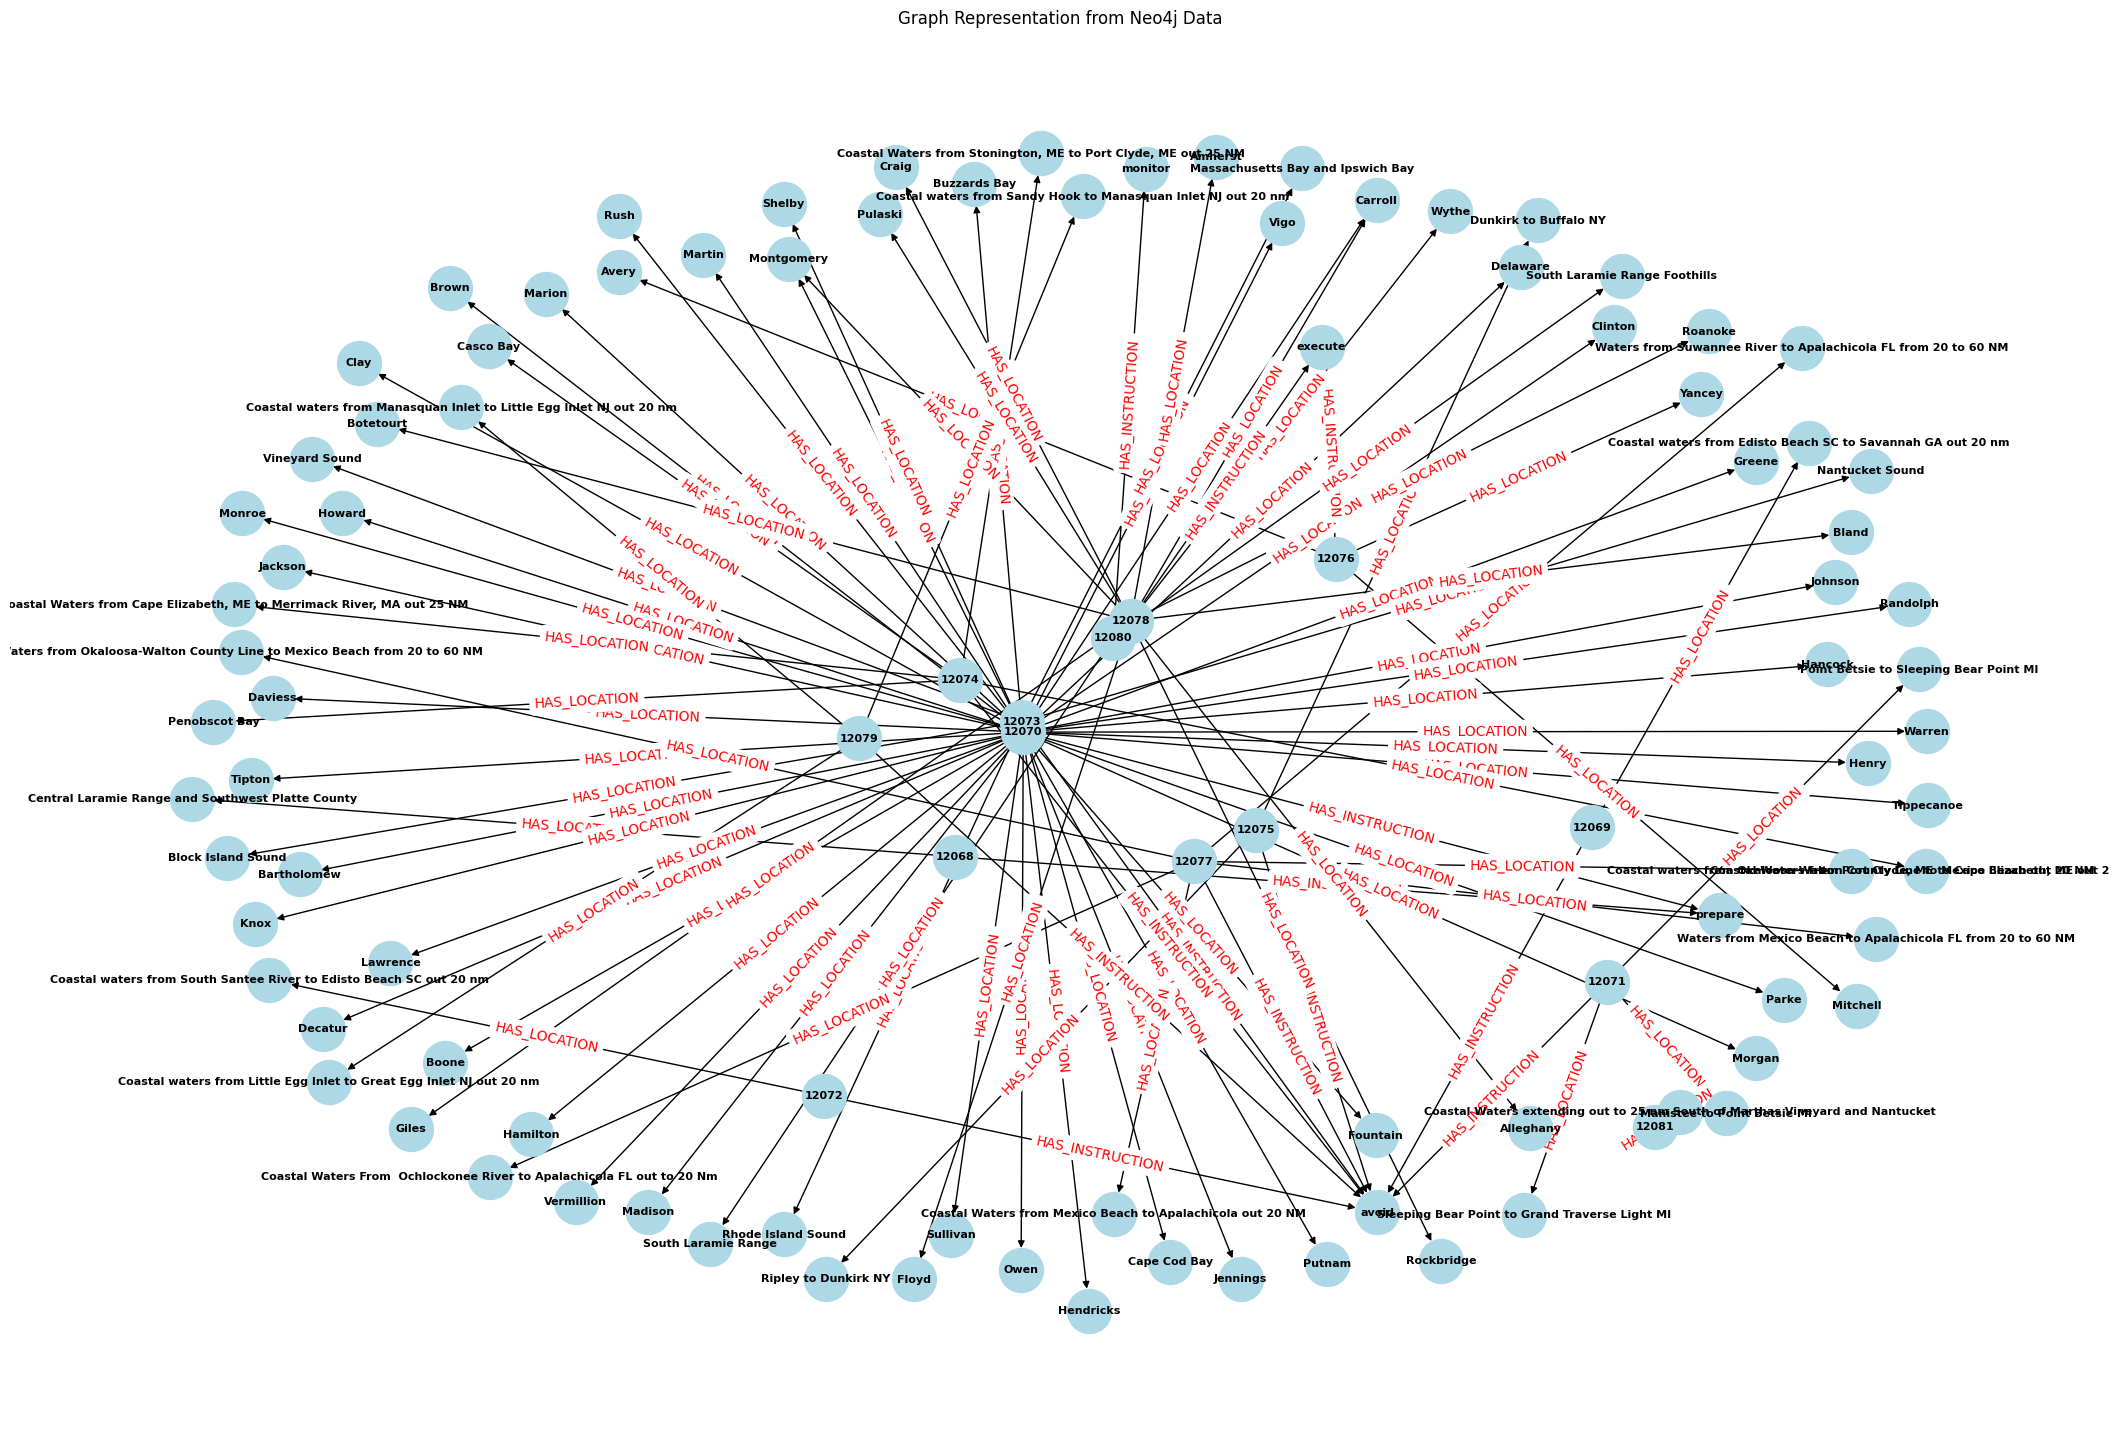

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.DiGraph()  # Using DiGraph for directed relationships, or you could use Graph for undirected

# Loop through the results and add nodes and edges to the NetworkX graph
for record in result:
    node_n = record['n']
    node_m = record['m']
    relation = record['r']

    # Extract IDs or other unique identifiers to use as node keys
    node_a_id = (
        node_n['name'] if 'name' in node_n else
        node_n['responseType'] if 'responseType' in node_n else
        node_n['alert_id'] if 'alert_id' in node_n else
        node_n.identity
    )

    node_b_id = (
        node_m['name'] if 'name' in node_m else
        node_m['responseType'] if 'responseType' in node_m else
        node_m['alert_id'] if 'alert_id' in node_m else
        node_m.identity
    )


    # Add nodes to the graph
    G.add_node(node_a_id, label=node_n.get('event', 'unknown'))
    G.add_node(node_b_id, label=node_m.get('event', 'unknown'))

    # Add edge with relationship type as label
    G.add_edge(node_a_id, node_b_id, label=relation.__class__.__name__)

# Step 4: Draw the Graph
# Use NetworkX to draw the graph
plt.figure(figsize=(21, 14))
pos = nx.spring_layout(G)  # Positioning the nodes for visualization
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Graph Representation from Neo4j Data")
plt.show()
